# Census Income Project

But First Let us import some necessary libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We have 32560 rows and 15 columns in our data set.We have to predict whether a person makes over $50K a year hence our target variable is income. we see that the income contains categories >50k and <=50k , therefore it has binary data and is a binary classification problem

# EDA

Now lets us have a look at our columns

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

some columns contain categorical values and we will have to convert it to numerical values in order for the ml algorith to understand it

# Checking Null Values

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

luckily we do not have any null values

<AxesSubplot:>

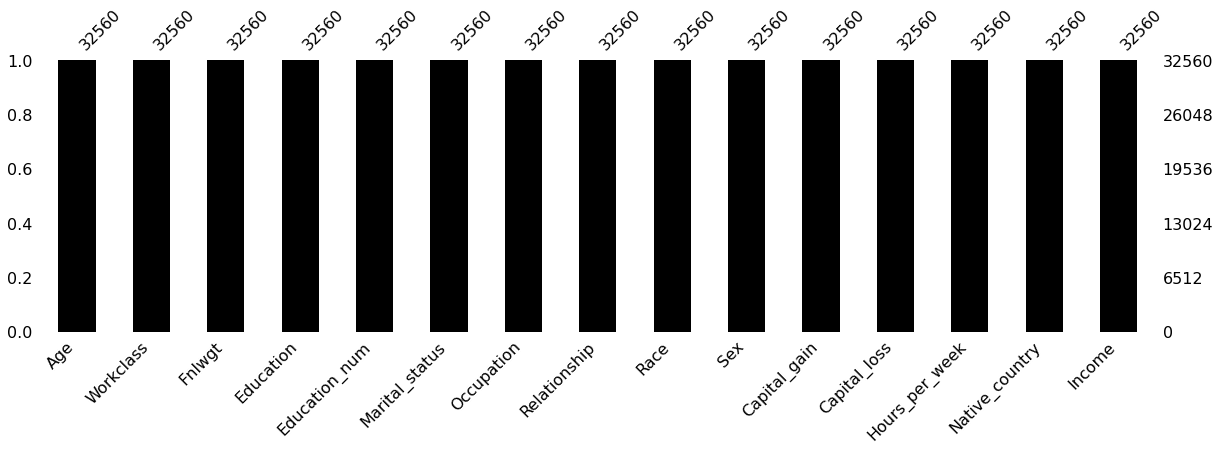

In [6]:
import missingno
missingno.bar(df, figsize = (20,5), color="black")

we can see that all the columns are filled

# Checking The DataType Of our columns

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we can see that few columns are of object data type and will have to be taken care of

# Making seperate list for object and int datatype

In [8]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
print(f"\nFloat Data Type Columns are: ", integer_datatype)

Object Data Type Columns are:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

Float Data Type Columns are:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


# Checking Unique Values

In [9]:
df.nunique().to_frame('Unique Values')

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


we can see that our target column has two unique values and we can say that it is binary

In [10]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("-" * 120)

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Marital_status
 Married-civ-spouse       14976
 Never-married      

we observe that some columns have ? in their data , we will have to rename these first for visualization

In [11]:
df['Workclass'].replace({' ?':' Unkown Workclass'},inplace=True)
df['Occupation'].replace({' ?':' Unkown Occupation'},inplace=True)
df['Native_country'].replace({' ?':' Unkown Native Country'},inplace=True)

# Description of the DataFrame

In [12]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


from the count value we can again confirm that there are no misisng values

From the description we observe that difference between the 25%,50% with max is almost more than half therefore we can say that alot of outliers may be present. for the diff between the 75% and max outliers are present but lesser compared to the other two.

# Visualization

I will be using the lis object_datatype that i created for columns with object_datatype for visualization of categorical data

In [13]:
object_datatype

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

I will be using the list integer_datatype that i created for columns with integer_datatype for visualization of numerical  data

In [14]:
integer_datatype

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

Countplot

<AxesSubplot:xlabel='Income', ylabel='count'>

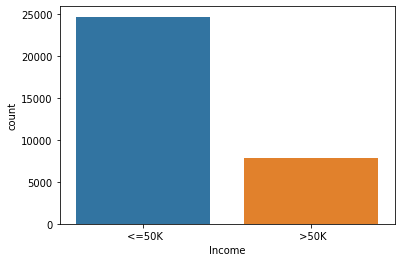

In [15]:
sns.countplot(df['Income'])

We can see that the data is not balanced. We will have to take care of this using SMOTE

Here we see that the income <=50k is greater than the income >50k

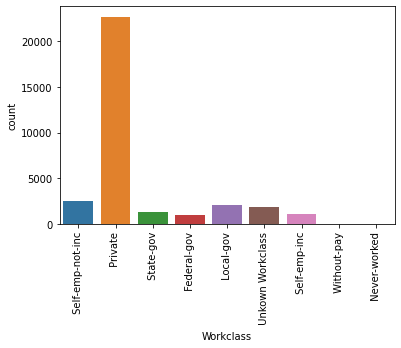

In [16]:
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

we observe that majority of workclass belongs to private class, and we also see that there is no data for people without pay class and people who have never worked

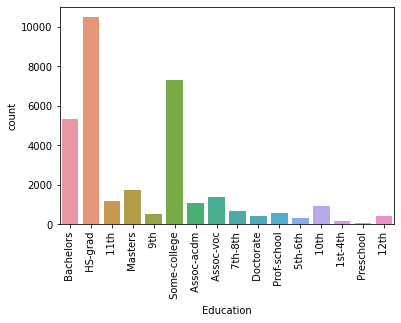

In [17]:
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

we observe that people with Hs-grad backgroud are the most and then people who have some college degree. The least education is that of preschool

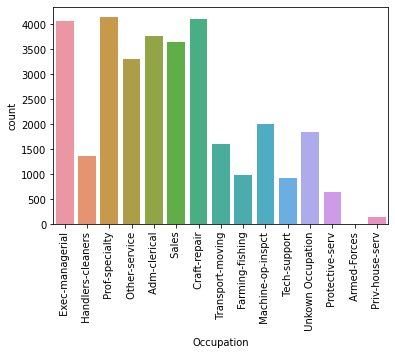

In [18]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

we can see that the occupation Exec-managerial, Prof-speciality, Craft-repair,are almost at the same level. We can hardly see any data on the occupation as armed forces and private house service

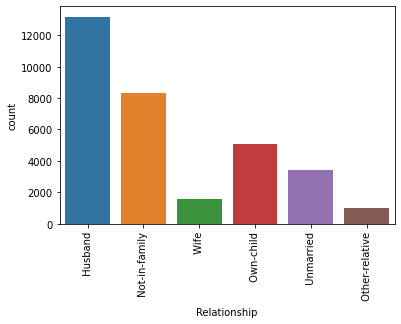

In [19]:
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show()

we observe that majority of the people are husabnds and the least number of people are wives

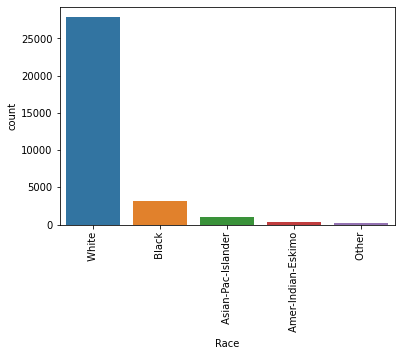

In [20]:
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show()

Majority of the people have the race white and the least people are of other race which could be hispanic ,alaska native etc etc.

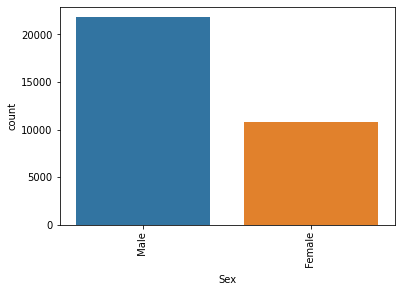

In [21]:
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show()

 we can see that the ration of males is more than females , as is usually almost everywhere

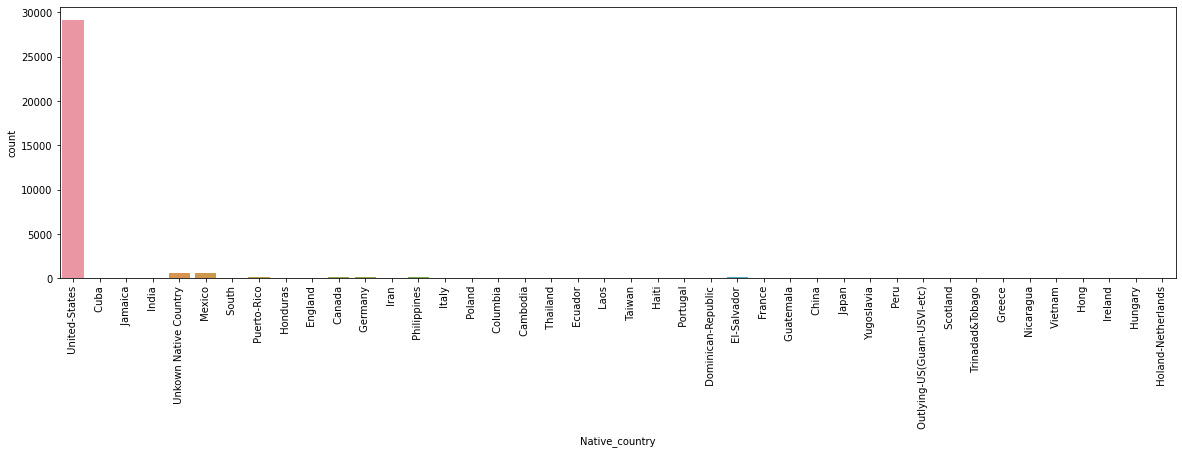

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

Majority of the people have their native country as United States, and some as other native_country and mexico. While all the other native countries have almost nill data 

Scatterplot

<AxesSubplot:xlabel='Income', ylabel='Age'>

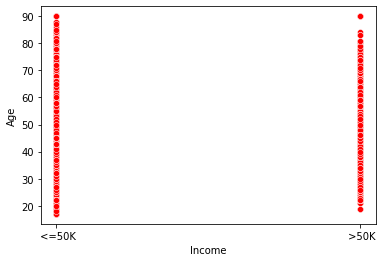

In [23]:
sns.scatterplot(x='Income',y='Age',data=df,color='red')

we see that the income greater than 50k and less than or equal to 50k is uniform till age of around 85

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

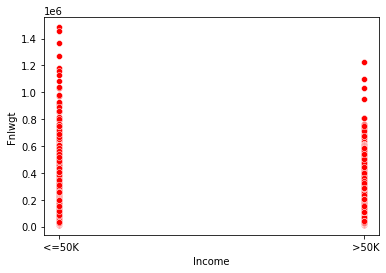

In [24]:
sns.scatterplot(x='Income',y='Fnlwgt',data=df,color='red')

we see that the income greater than 50k and less than or equal to 50k is uniform till Fnlwgt value of around 0.8 and people with income less than or equal to ahs more final weight

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

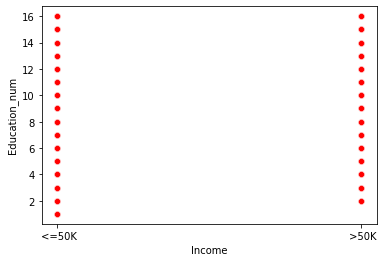

In [25]:
sns.scatterplot(x='Income',y='Education_num',data=df,color='red')

we see that the income greater than 50k and less than or equal 50k to is uniform for educational_num

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

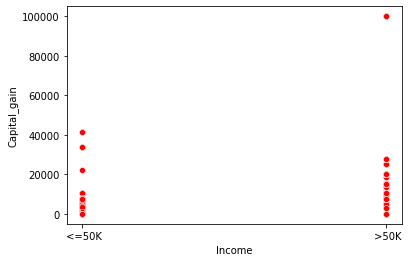

In [26]:
sns.scatterplot(x='Income',y='Capital_gain',data=df,color='red')

we see that the income greater than 50k and less than or equal to 50k is not unifrom for capital gain and we can see the presence of an outlier and the capital gain is more for peope with income grater than 50k

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

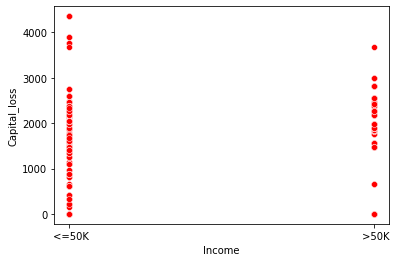

In [27]:
sns.scatterplot(x='Income',y='Capital_loss',data=df,color='red')

we see that the income less tha equal to 50k is continuous till a capital_loss of almost 2800 and greater than 50k  is continuous in the capital_loss range(1500,2700)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

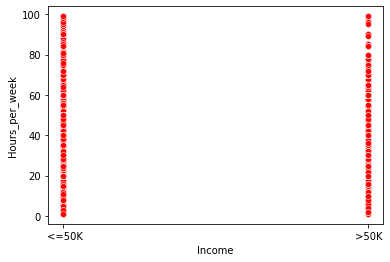

In [28]:
sns.scatterplot(x='Income',y='Hours_per_week',data=df,color='red')

we see that the income greater than 50k and less than or equal 50k to is uniform for Hours_per_week

Barplot

In [29]:
object_datatype

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

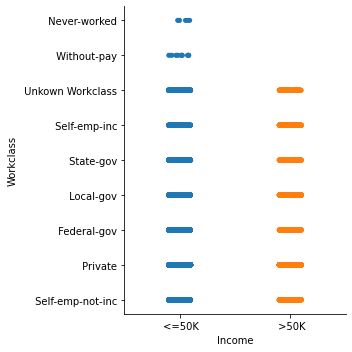

In [30]:
sns.catplot(x="Income", y="Workclass",data=df)

There are no people who have never worked or worked without pay with income >50k

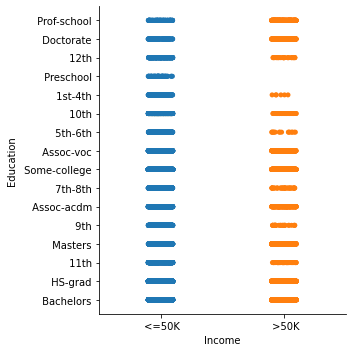

In [31]:
sns.catplot(x="Income", y="Education",data=df)

people whose education is pre school or 1st-4th stansard do not have an income of greater than 50k

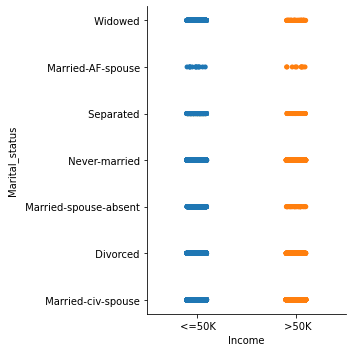

In [32]:
sns.catplot(x="Income", y="Marital_status",data=df)

people with all types of marital_status have both income greater than 50k and less than or equal to 50k

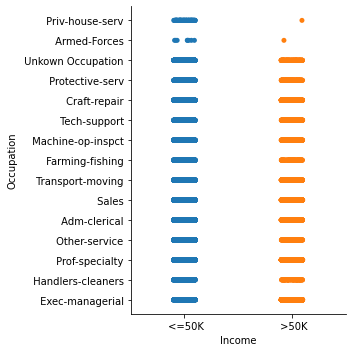

In [33]:
sns.catplot(x="Income", y="Occupation",data=df)

there are very less people with the occupation of armed Forces and private house service with income grater tha 50k

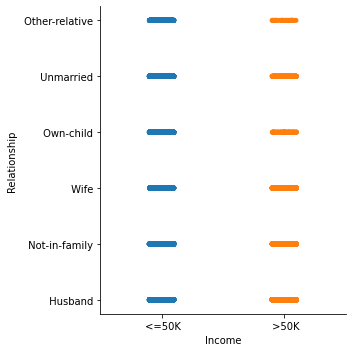

In [34]:
sns.catplot(x="Income", y="Relationship",data=df)

people with all types of relationship have both income greater than 50k and less than or equal to 50k

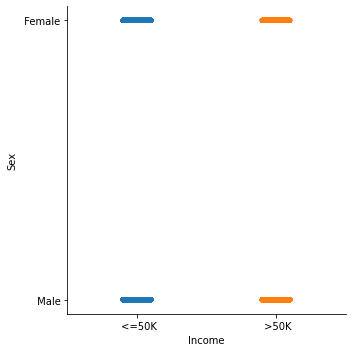

In [35]:
sns.catplot(x="Income", y="Sex",data=df)

people who are either male or female have both income graeter than 50k and less than or equal to 50k

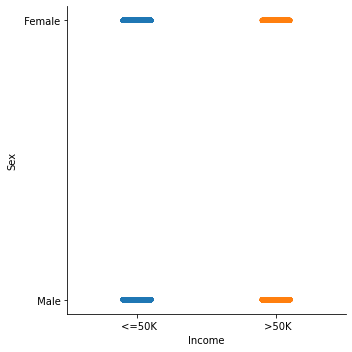

In [36]:
sns.catplot(x="Income", y="Sex",data=df)

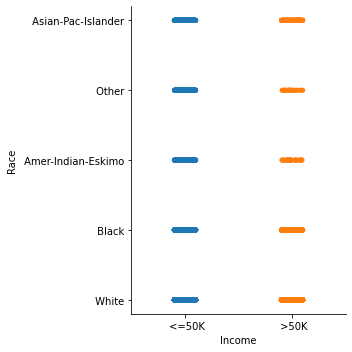

In [37]:
sns.catplot(x="Income", y="Race",data=df)

people with all types of race have both income grater than 50k and less tha or equal to 50k

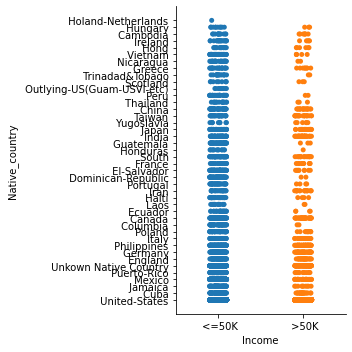

In [38]:
sns.catplot(x="Income", y="Native_country",data=df)

people with some native countries like outlying-US do not have income greter than 50k, simlarly native countries like honduras, Hait, irna laos do no have income greater tha 50k

Vilolin Plot

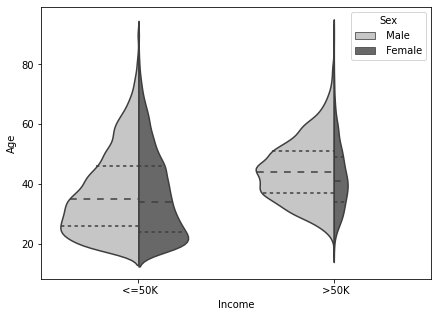

In [39]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.show()

The males in any age group have a higer income tha females

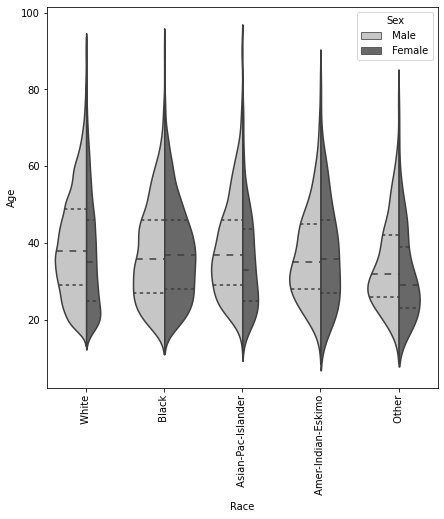

In [41]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

we can see that females with balck ethnicity of any age group is higher tha the other etnicity group in females

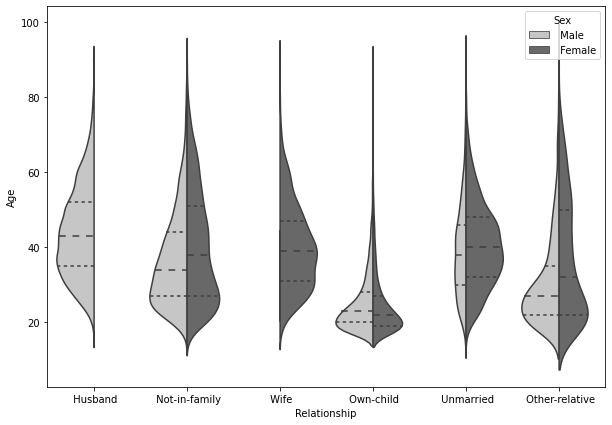

In [42]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.show()

we se that that people in the own child relationship age from 10-40. Also we have female who are unmarried more than the male counter parts.

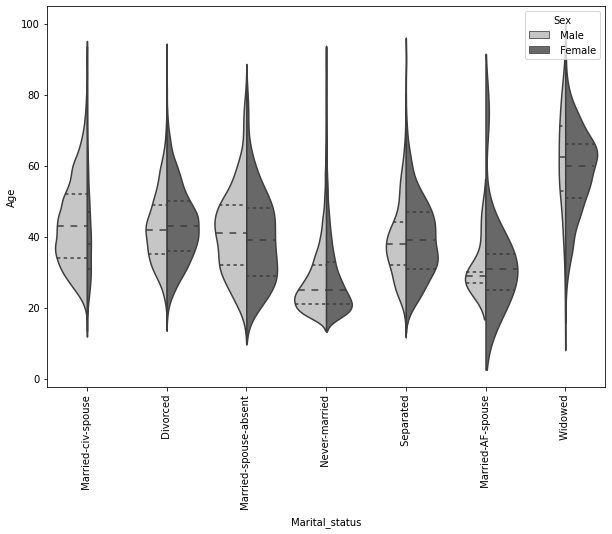

In [43]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

we observe that the marital status as married spouse have a higher number in male than in female and people who are widowed have a higher number in females as compared to the males.

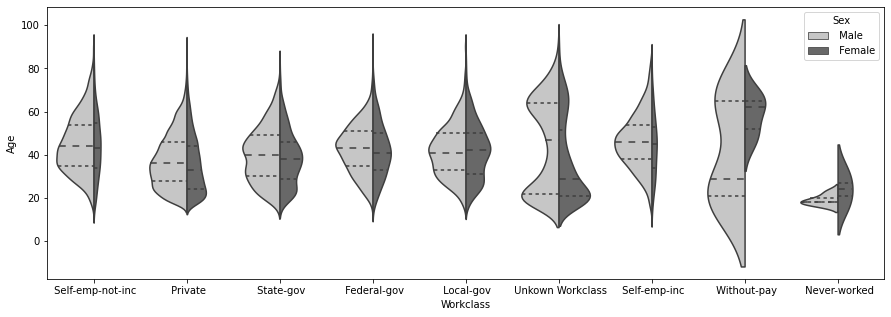

In [44]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.show()

we see that the males cover most of the working class sectors in each category as compared to the females.

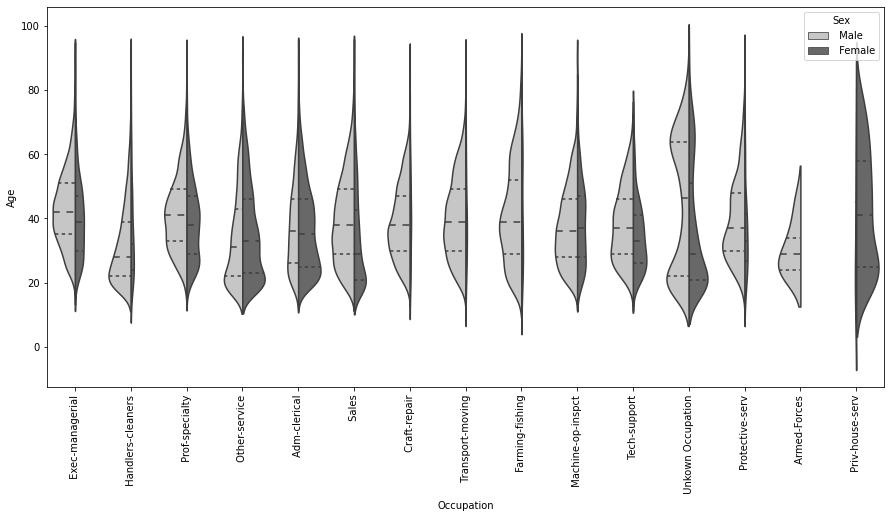

In [45]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

we can see that the designation of private house services has more number of female mostly from the 20-60 age group while occupations such as craft repair, transport moving, farming/fishing, protective/security service and armed forces have a larger number of data coverage for males.

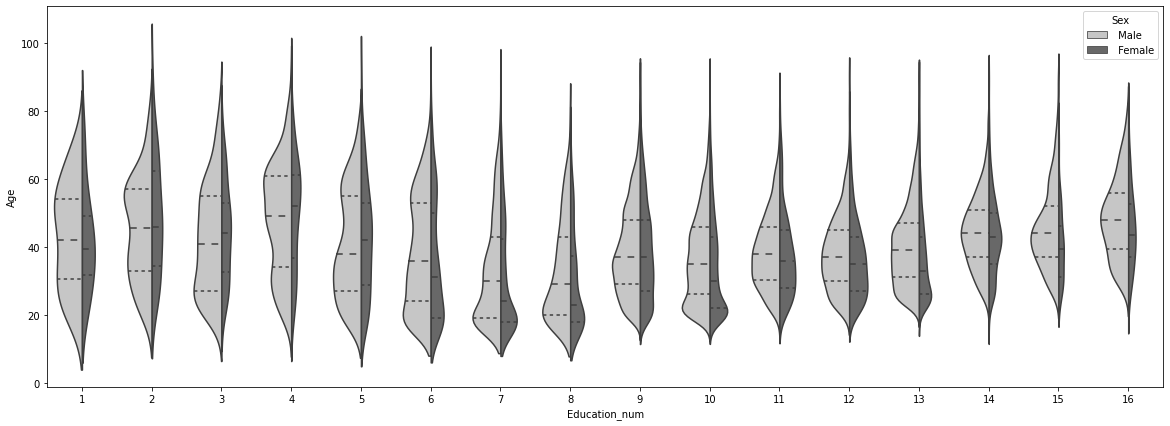

In [46]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows us that males in all age group have a higher education number compared to their female counter parts

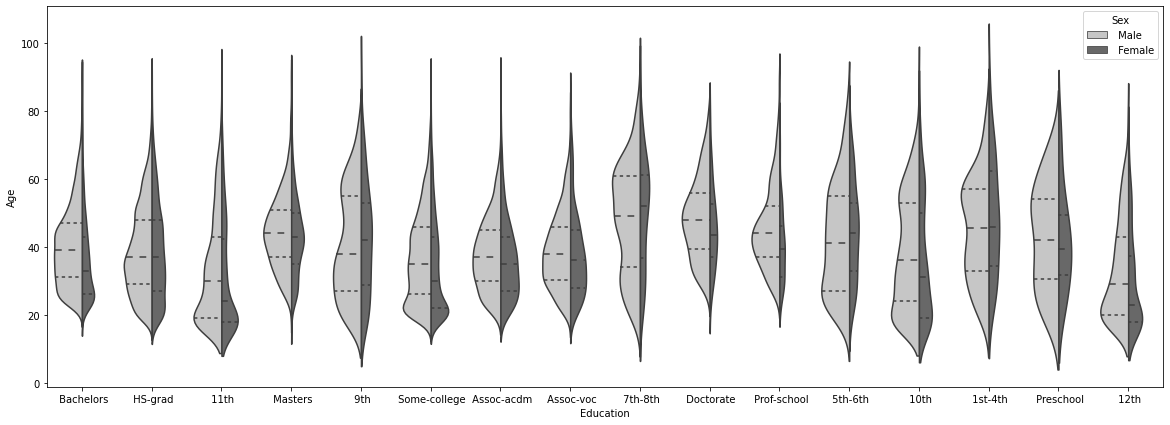

In [47]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Greys", split=True, scale="count", inner="quartile")
plt.show()

We can see that just like the education number the education category sees more number of males than their female counter parts giving us a red flag on how female education is a concern.

# Encoding

Let us use Label encoding to convert our target to int values, that is, 0's and 1's

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


we have succesfully converted our target column into binary values, 0's and 1's

Now let us covert our categorical independent variables datatype to int using ordinal encoder

In [49]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0


In [50]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income              int32
dtype: object

# Normal Distribution Curve

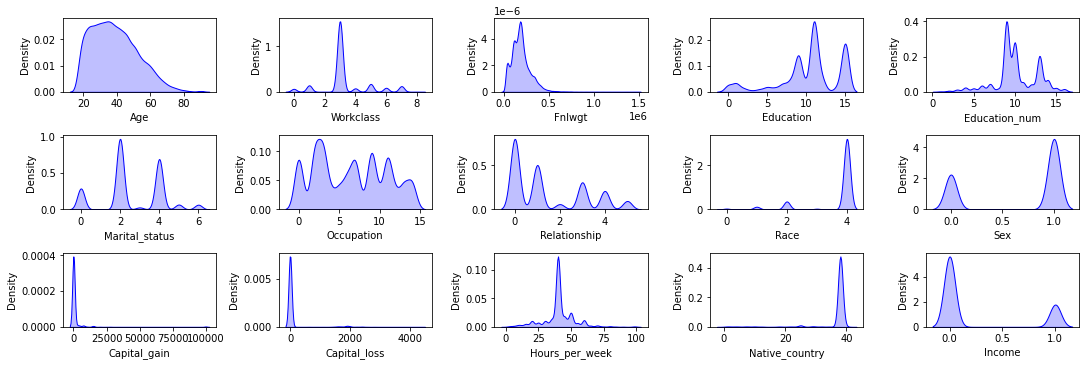

In [51]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="blue", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

from the Normal Distribution Plot we can see that that there is skweness present in columns Workclass,Fnlwgt, Education_num, Race, Capital_gain,Capital_loss,Hours_per_week, native_country

Box Plot

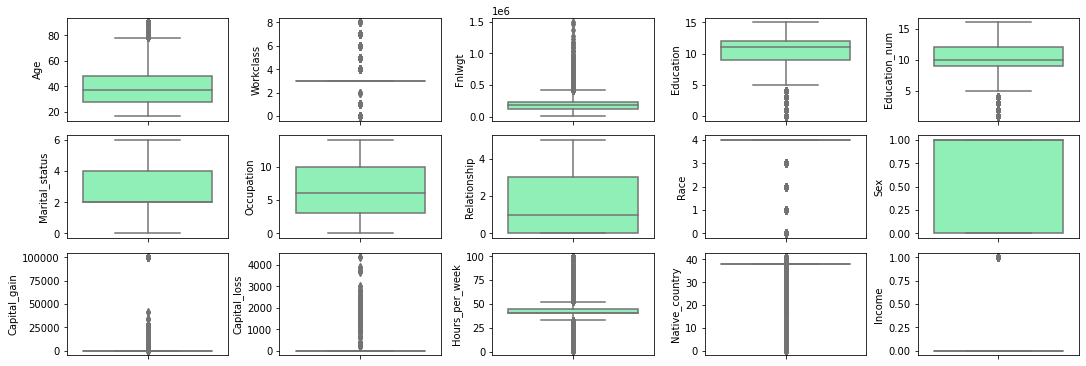

In [52]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="rainbow")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see the presence of outliers in most of the columns

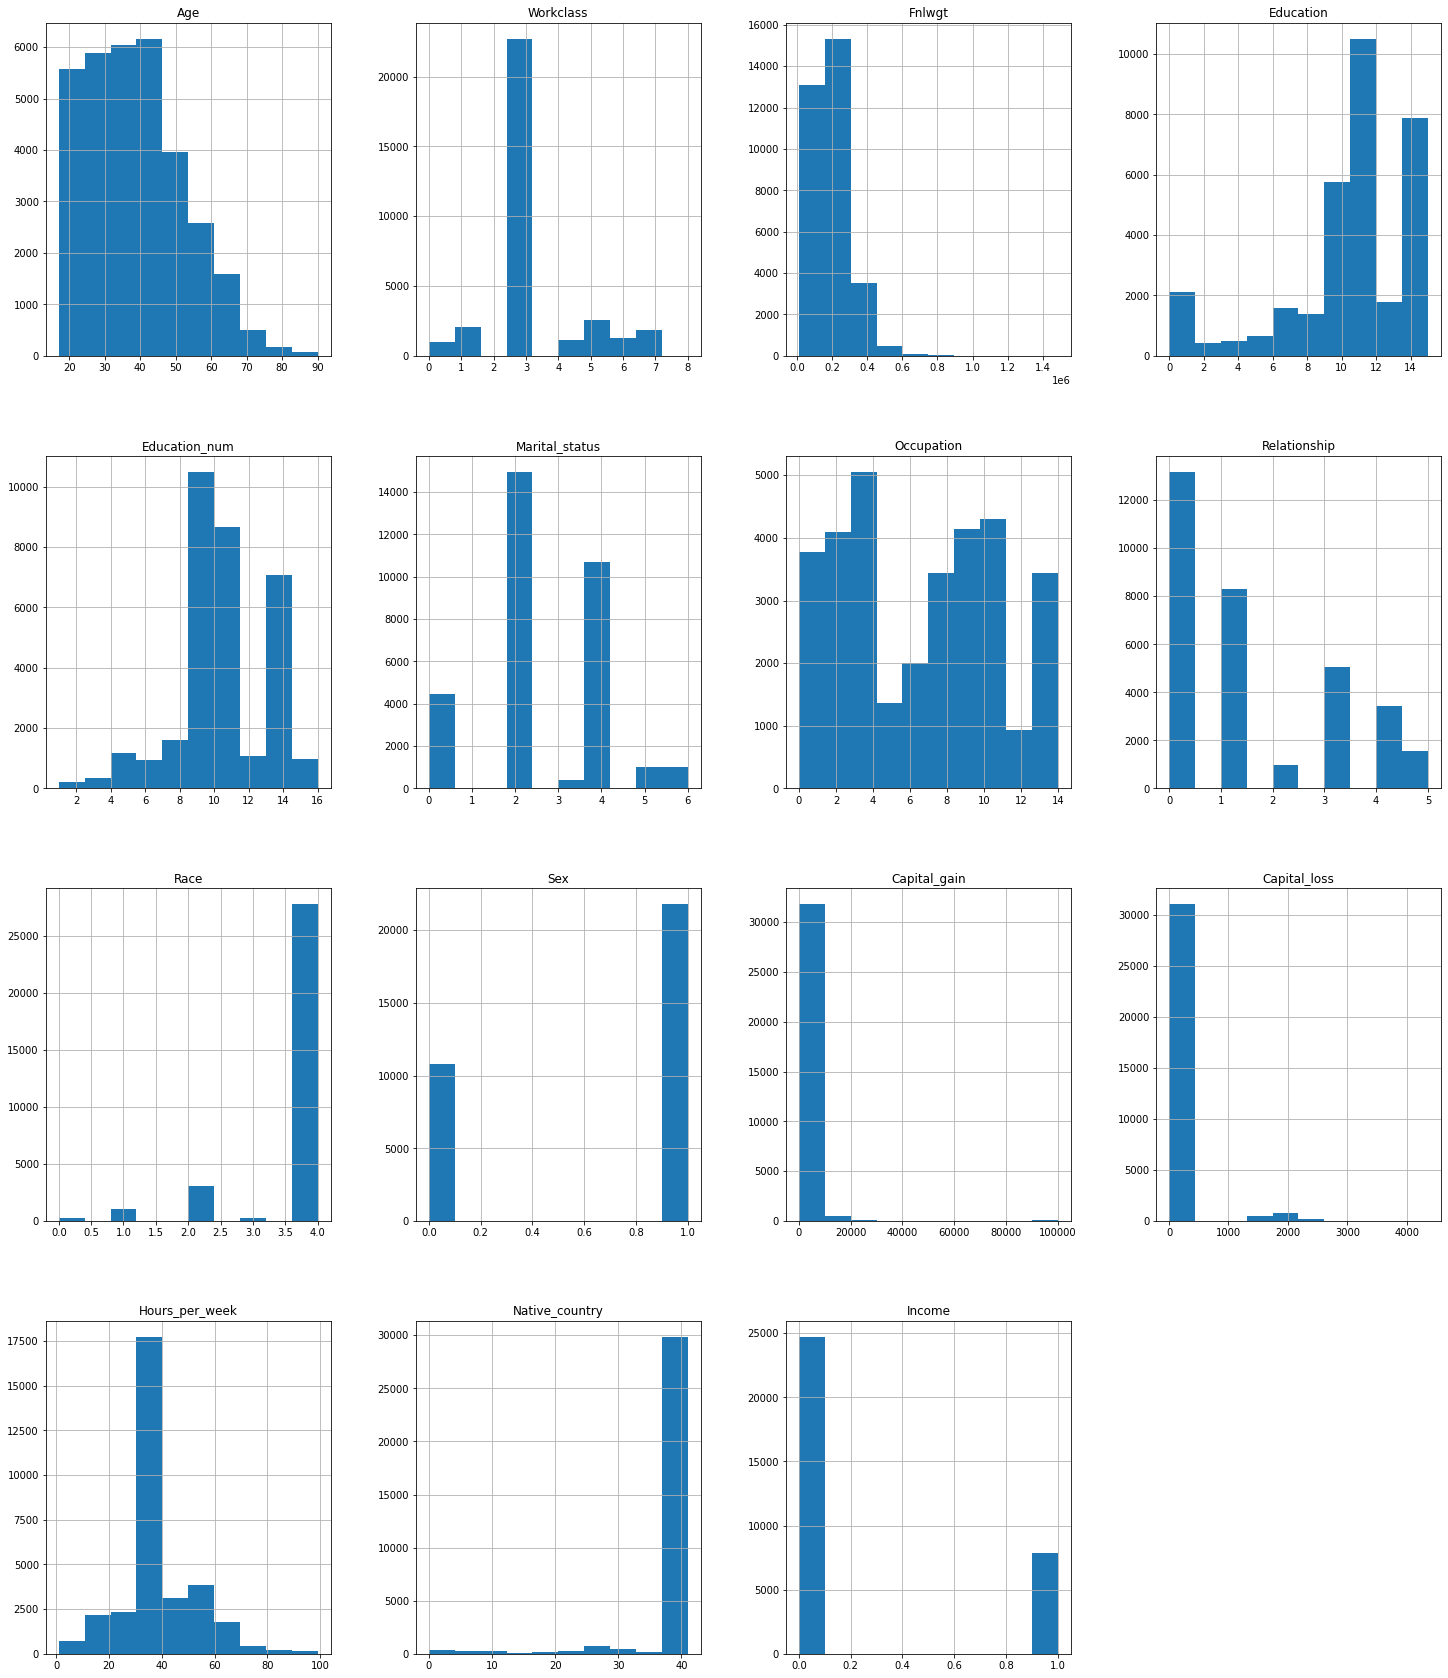

In [53]:
df.hist(figsize=(25,30))
plt.show()

we have plotted a histogram for our data frame after encoding

# Correlation With Target Columns

In [54]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Workclass        -0.048590
Fnlwgt           -0.009481
Occupation        0.010777
Native_country    0.022994
Race              0.071853
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

we dont see any high positive or negative correlation values

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

<AxesSubplot:>

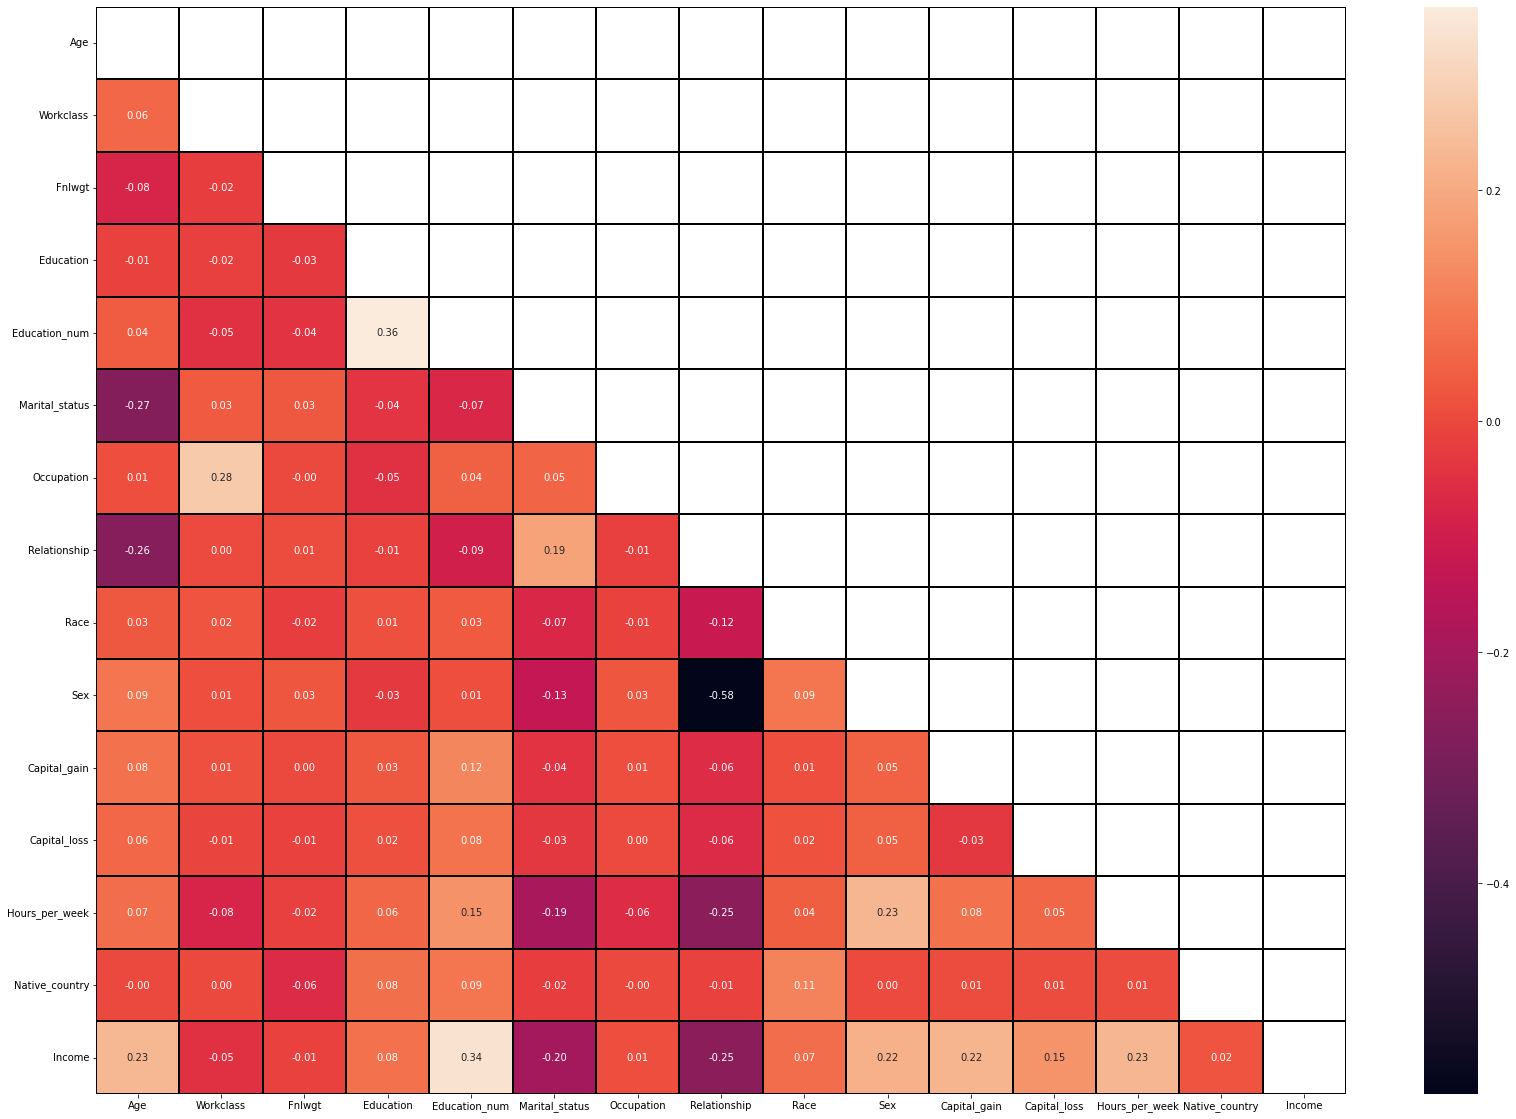

In [55]:
plt.figure(figsize=(28,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.2f',mask=np.triu(df.corr()))

Income is most positively co related with age and hours_per_week with a correlation value of 0.23 and most negatively correlated with relationship with a value of -0.25. 
It is easier for us to indentify the correlation between variables with the help of a heat map. A zero correlation indicates there is no relationship between variables. Our target column 'attrition' has both negative and positive correlation with our independent varaibles.If we assume the multicollinearity coefficient as r in the range +1,-1 then a value of 1 is said to be perfectly multicollinear. i do not see any high correlation valueWe dont have to worry about multicollinearity

# Bar Plot for all the columns with the Target 'Attrition'

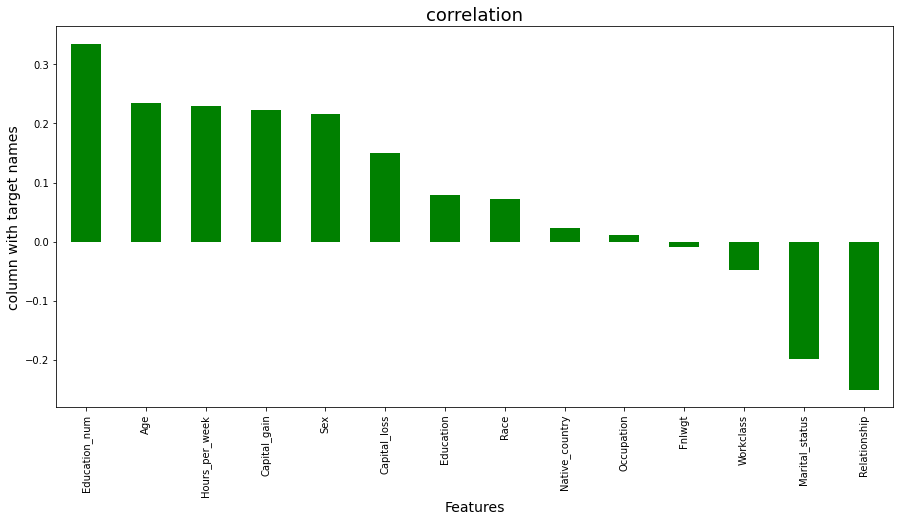

In [56]:
plt.figure(figsize=(15,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='green')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see the columns that are postively and negatively correlated with income clearly with the bar plot

# Removing Ouliers

using z score to remove outliers

In [57]:
df.shape

(32560, 15)

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

Setting the value of threshold as 3

In [59]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0


Let us calculate the percentage loss of data in removing the outliers

In [60]:
Data_loss=((32560-27770)/32560)*100
print(Data_loss,'%')

14.71130221130221 %


we can proceed with our new dataframe

# Handling Skweness

In [61]:
df.skew()

Age                0.558738
Workclass          0.720049
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.236041
Income             1.212383
dtype: float64

if we take the range of skewness as (-1,1) then the columns Fnlwgt, Race, Capital_gain, Capital_loss ,native_country and income are highly skewed

# Applying Log Transform

In [62]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

Age              -0.113322
Workclass        -1.405902
Fnlwgt           -0.842559
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.126702
Relationship      0.284979
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -4.236041
Income            1.212383
dtype: float64

we have been able to remove skewness upto some extent 

# Separating the columns into 'features' and 'targets' as 'x1' and 'y1' for our classification model

In [63]:
x1=df_new_z.drop('Income',axis=1)
y1=df_new_z['Income']
print(x1.shape)
print(y1.shape)

(27770, 14)
(27770,)


In [64]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Applying SMOTE

In [65]:
y1.value_counts()

0    21544
1     6226
Name: Income, dtype: int64

we can see that our data is imbalanced

In [66]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x1,y1=oversample.fit_resample(x1,y1)

In [67]:
y1.value_counts()

0    21544
1    21544
Name: Income, dtype: int64

we have been successful in balancing our data

# Feature Scaling

i scaling my data to avoid any biasness towards a column so that our data is standardized

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[ 0.8149077 ,  1.31406361, -1.08743576, ..., -0.03032247,
        -2.78083945,  0.16756191],
       [-0.17321177, -0.19272321,  0.32184244, ..., -0.03032247,
        -0.14911812,  0.16756191],
       [ 1.06193757, -0.19272321,  0.52497829, ..., -0.03032247,
        -0.14911812,  0.16756191],
       ...,
       [-0.58492821,  1.95311445, -0.68336849, ..., -0.03032247,
         1.70283393,  0.16756191],
       [-0.17321177,  0.59278177,  1.36274991, ..., -0.03032247,
         0.82559349,  0.16756191],
       [ 0.0738181 ,  1.7553316 , -1.08637083, ..., -0.03032247,
        -0.14911812,  0.16756191]])

# Power Transform

In [69]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')
x1

array([[ 0.8310575 ,  1.26934592, -1.17858055, ..., -0.03339523,
        -2.53044909,  0.04908932],
       [-0.12745272, -0.11423742,  0.44436413, ..., -0.03339523,
        -0.20025506,  0.04908932],
       [ 1.05772875, -0.11423742,  0.62780209, ..., -0.03339523,
        -0.20025506,  0.04908932],
       ...,
       [-0.5590531 ,  1.77307133, -0.65223238, ..., -0.03339523,
         1.83145769,  0.04908932],
       [-0.12745272,  0.65292747,  1.30394169, ..., -0.03339523,
         0.82646285,  0.04908932],
       [ 0.12213273,  1.62059969, -1.17713929, ..., -0.03339523,
        -0.20025506,  0.04908932]])

# Finding the best accuracy at random state

In [70]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 77.62822000464145 at Random State 663


# Logistic Regression

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=955)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  77.30331863541426

Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      4321
           1       0.76      0.79      0.78      4297

    accuracy                           0.77      8618
   macro avg       0.77      0.77      0.77      8618
weighted avg       0.77      0.77      0.77      8618

Cross Validation Score: 76.3019788528901

Accuracy Score - Cross Validation Score is 1.0013397825241555


# Support vector classifier

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=955)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  85.29821304246926

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      4321
           1       0.82      0.90      0.86      4297

    accuracy                           0.85      8618
   macro avg       0.86      0.85      0.85      8618
weighted avg       0.86      0.85      0.85      8618

Cross Validation Score: 84.46675769478118

Accuracy Score - Cross Validation Score is 0.8314553476880775


# Decision Tree Classifier

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=955)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  86.6674402413553

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4321
           1       0.86      0.87      0.87      4297

    accuracy                           0.87      8618
   macro avg       0.87      0.87      0.87      8618
weighted avg       0.87      0.87      0.87      8618

Cross Validation Score: 85.33027523108736

Accuracy Score - Cross Validation Score is 1.3371650102679382


# KNeighborsClassifier

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=955)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  85.08934787653747

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      4321
           1       0.83      0.88      0.85      4297

    accuracy                           0.85      8618
   macro avg       0.85      0.85      0.85      8618
weighted avg       0.85      0.85      0.85      8618

Cross Validation Score: 84.70116456072022

Accuracy Score - Cross Validation Score is 0.3881833158172583


# Random Forest Classifier

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=955)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  90.55465305175214

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      4321
           1       0.92      0.89      0.90      4297

    accuracy                           0.91      8618
   macro avg       0.91      0.91      0.91      8618
weighted avg       0.91      0.91      0.91      8618

Cross Validation Score: 88.49128346867481

Accuracy Score - Cross Validation Score is 2.063369583077332


# Extra Trees Classifier

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

et=ExtraTreesClassifier()
#training the model
et.fit(x_train,y_train)
    
#Predicting y_test
pred=et.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(et,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  89.81715893108299

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7073
           1       0.90      0.90      0.90      7147

    accuracy                           0.90     14220
   macro avg       0.90      0.90      0.90     14220
weighted avg       0.90      0.90      0.90     14220

Cross Validation Score: 88.54463453686095

Accuracy Score - Cross Validation Score is 1.2725243942220317


# I will choose KNeighborsClassifier for hyperparameter tuning as it is giving me the least value of accuracy score-cross validation

The parameter have been taken after referring from the sklearn webpage

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [80]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [81]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [82]:
grid_search.best_score_

0.9017116333043226

In [84]:
Final_Model = RandomForestClassifier(bootstrap=True,max_features=2, max_depth=80, min_samples_leaf=4, 
                                     min_samples_split=8,n_estimators=1000)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
hcvs=cross_val_score(rf,x1,y1,cv=5)
print('Cross Validation score of Random Forest model : ',hcvs.mean())

Accuracy score for the Best Model is: 90.57786029241123
Cross Validation score of Random Forest model :  0.8847967877106819


# AOC ROC Curve

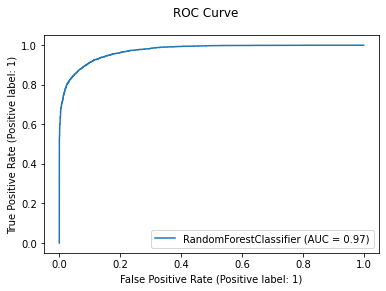

In [85]:
from sklearn import metrics
curve = metrics.plot_roc_curve(Final_Model, x_test, y_test)
curve.figure_.suptitle("ROC Curve")
plt.show()

# The Auc of my final model,RandomForestClassifier, is 97%

# Confusion Matrix

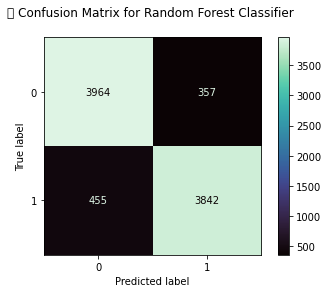

In [86]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

From the confusion matrix we can see that our TP=3964,FP=357,FN=455,TN=3842

that means that are 3964 postive values were correctly classified

340 negative values were correctly classified

455 postive values were incorrectly classified

3842 negative values were incorrectly classifed

all in all i can conclude that our confusionmatrix shows us that our model is working pretty well

# Model Saving

In [91]:
import pickle
filename='Census_Income_E5.pkl'
pickle.dump(rf,open(filename,'wb'))